In [98]:
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.datasets import make_classification
import numpy as np

In [51]:
def generate_column_partition(n, k, min_first=2):
    if k < 1:
        raise ValueError("Number of categories must be at least 1.")
    if n < min_first:
        raise ValueError("Total must be at least as large as the minimum first value.")

    min_first += 1
    remaining = n - min_first + 1

    # Generate k-1 non-negative integers that sum to `remaining`
    # This is done by generating (k-2) cut points between 0 and remaining,
    # and sorting them to form the segments
    cuts = sorted(random.sample(range(remaining + k - 1), k - 1))
    partition = [cuts[0]]
    for i in range(1, len(cuts)):
        partition.append(cuts[i] - cuts[i - 1])
    partition.append(remaining + k - 1 - cuts[-1])

    # Subtract 1 from each (stars and bars method)
    partition = [x - 1 for x in partition]

    # Prepend the fixed minimum for the first category
    partition[0] += min_first

    return partition

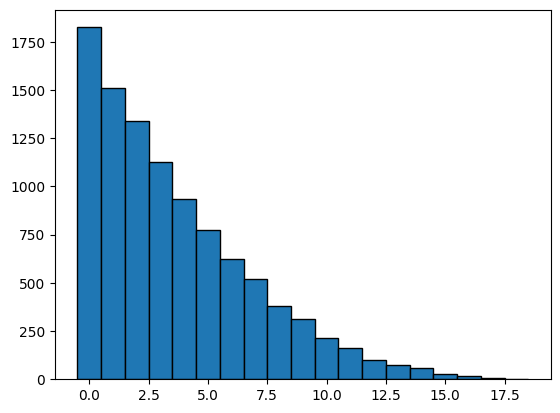

In [74]:
holder = []
for i in range(10000):
    lis = generate_column_partition(20, 5)
    holder.append(lis[2])

plt.hist(
    holder, bins=range(min(holder), max(holder) + 2), edgecolor="black", align="left"
)
plt.show()

In [57]:
lis

[5, 3, 2, 9, 1]

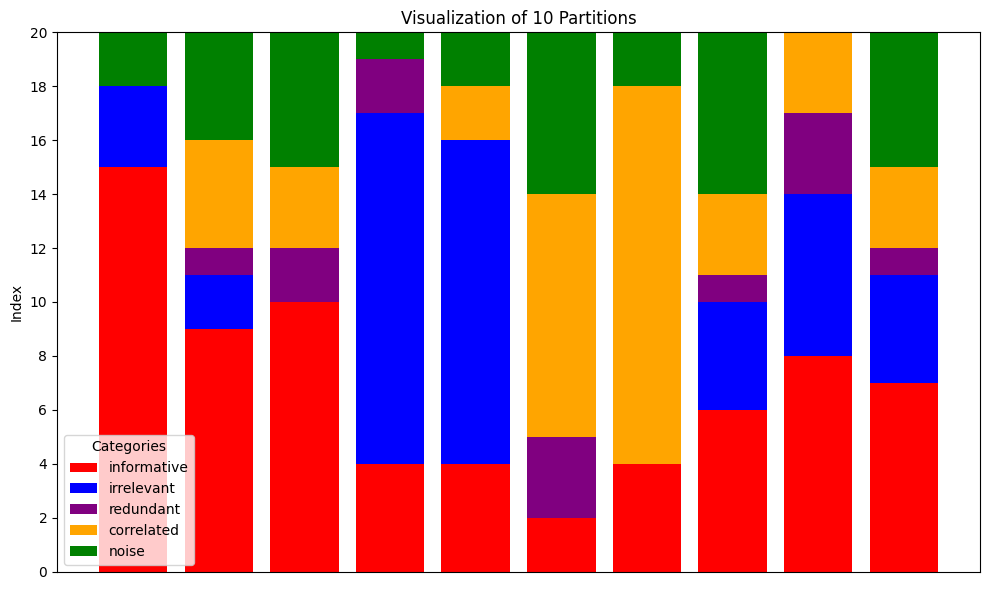

In [73]:
num_partitions = 10
n = 20
k = 5
partitions = [generate_column_partition(n, k) for _ in range(num_partitions)]

# Transpose the list to group categories
categories = list(
    zip(*partitions)
)  # Each sublist corresponds to one category across all partitions

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x = list(range(num_partitions))
bottom = [0] * num_partitions
colors = ["red", "blue", "purple", "orange", "green"]
labels = ["INFORMATIVE", "IRRELEVANT", "REDUNDANT", "CORRELATED", "NOISE"]

for i in range(k):
    ax.bar(
        x, categories[i], bottom=bottom, label=f"{labels[i].lower()}", color=colors[i]
    )
    bottom = [bottom[j] + categories[i][j] for j in range(num_partitions)]

ax.set_xticks([])  # Remove x-axis ticks
ax.tick_params(axis="x", bottom=False, labelbottom=False)  # Remove x-axis labels
ax.set_yticks(range(0, n + 1, 2))  # Y-axis ticks every 2 units
ax.set_ylabel("Index")
ax.set_title("Visualization of 10 Partitions")
ax.legend(title="Categories")
plt.tight_layout()
plt.show()

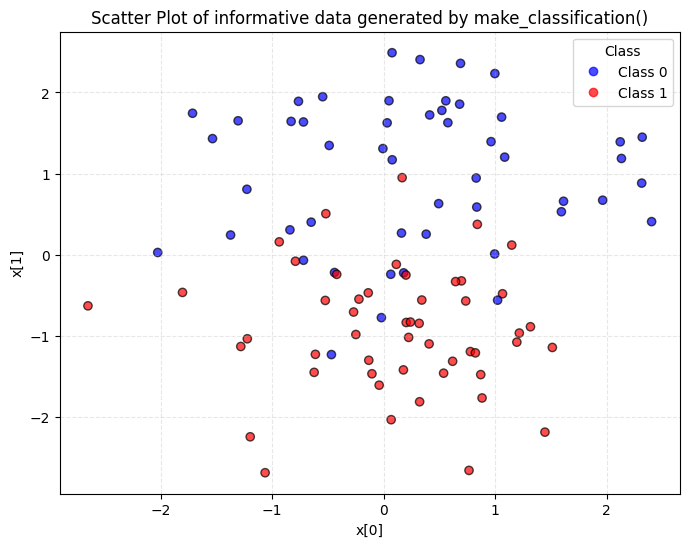

In [ ]:
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_clusters_per_class=2,
    class_sep=1.0,
    random_state=42,
)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", alpha=0.7)

# Optional: add legend if y has discrete class values
classes = np.unique(y)
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=[f"Class {i}" for i in classes],
    title="Class",
)

plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.title("Scatter Plot of informative data generated by make_classification()")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

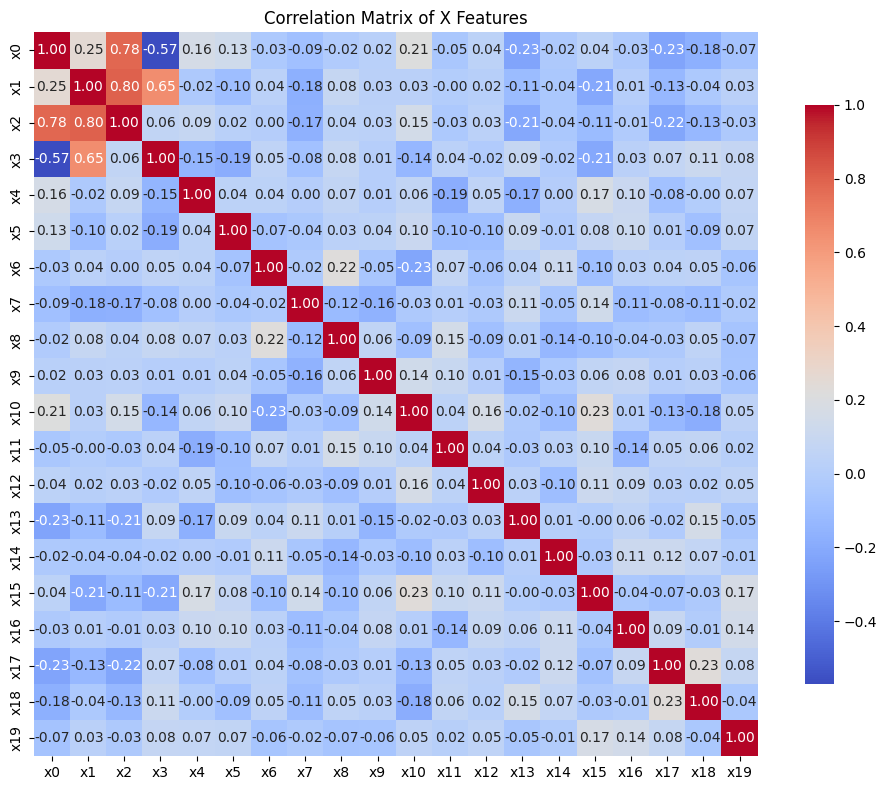

In [141]:
import pandas as pd
import seaborn as sns


X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_clusters_per_class=2,
    class_sep=1.0,
    shuffle=False,
)

df = pd.DataFrame(X, columns=[f"x{i}" for i in range(X.shape[1])])

# Compute correlation matrix
corr_matrix = df.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix of X Features")
plt.tight_layout()
plt.show()

In [ ]:
def generate_dataset(n_samples=1000, n_features=20, random_state=213):

    partition = generate_column_partition(n_features, 5)

    X, y = make_classification(
        n_samples=n_samples,
        n_features=20,
        n_informative=2,
        n_redundant=2,
        n_repeated=0,
        n_clusters_per_class=2,
        class_sep=1.0,
        random_state=random_state,
    )
    return X, y